数据挖掘互评作业2：频繁模式与关联规则挖掘_依西降参_3220211100

## Wine Reviews (winemag-data-130k-v2.csv) 数据集的频繁模式与关联规则挖掘

GitHub地址：https://github.com/Eshjamtsand/data-mining-2

### 1. 数据集基本信息
对数据集的属性个数、样本个数、缺失值个数做个简单分析。

In [24]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt
import pylab
from collections import defaultdict
import itertools
wine_file='C:\\Users\\admin\\Downloads\\archive\\winemag-data-130k-v2.csv'
winedata=pd.read_csv(wine_file,index_col=0)
print('数据的列数为：',winedata.shape[1])
print('数据的行数为：',winedata.shape[0])
print('数据的前3列为如下：')
winedata.head(3)

数据的列数为： 13
数据的行数为： 129971
数据的前3列为如下：


,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm


In [4]:
print('数据集的属性分布如下：')
winedata.info()

数据集的属性分布如下：
<class 'pandas.core.frame.DataFrame'>
Int64Index: 129971 entries, 0 to 129970
Data columns (total 13 columns):
country                  129908 non-null object
description              129971 non-null object
designation              92506 non-null object
points                   129971 non-null int64
price                    120975 non-null float64
province                 129908 non-null object
region_1                 108724 non-null object
region_2                 50511 non-null object
taster_name              103727 non-null object
taster_twitter_handle    98758 non-null object
title                    129971 non-null object
variety                  129970 non-null object
winery                   129971 non-null object
dtypes: float64(1), int64(1), object(11)
memory usage: 13.9+ MB


In [6]:
print('数据集属性的缺失值个数统计如下：')
nullnum=winedata.isnull().sum()
print(nullnum)

数据集属性的缺失值个数统计如下：
country                     63
description                  0
designation              37465
points                       0
price                     8996
province                    63
region_1                 21247
region_2                 79460
taster_name              26244
taster_twitter_handle    31213
title                        0
variety                      1
winery                       0
dtype: int64


### 2.属性缺失值用属性的众数进行填充

In [19]:
fulldata=winedata.copy()  
for column in list(winedata.columns):
    fulldata[column]=fulldata[column].fillna(winedata[column].mode()[0])
print('用每个属性的众数填充之后数据集缺失值统计如下：')
fulldata.isnull().sum()

用每个属性的众数填充之后数据集缺失值统计如下：


country                  0
description              0
designation              0
points                   0
price                    0
province                 0
region_1                 0
region_2                 0
taster_name              0
taster_twitter_handle    0
title                    0
variety                  0
winery                   0
dtype: int64

抽取两个属性检查是否成功用众数填充缺失值：

In [18]:
#1.country属性
print('country属性的众数是：',winedata['country'].mode()[0])
print('原数据集country属性缺失值的对应编号为（前三个）：')
winedata[winedata['country'].isnull()]['country'].head(3)

country属性的众数是： US
原数据集country属性缺失值的对应编号为（前三个）：


913     NaN
3131    NaN
4243    NaN
Name: country, dtype: object

In [17]:
print('country属性缺失值的对应编号用众数填充后（前三个）：')
fulldata[winedata['country'].isnull()]['country'].head(3)

country属性缺失值的对应编号用众数填充后（前三个）：


913     US
3131    US
4243    US
Name: country, dtype: object

In [62]:
#2.variety属性
print('variety属性的众数是：',winedata['variety'].mode()[0])
print('原数据集variety属性缺失值的对应编号为：')
winedata[winedata['variety'].isnull()]['variety'].head(3)

variety属性的众数是： Pinot Noir
原数据集variety属性缺失值的对应编号为：


86909    NaN
Name: variety, dtype: object

In [63]:
print('variety属性缺失值的对应编号用众数填充后：')
fulldata[winedata['variety'].isnull()]['variety'].head(3)

variety属性缺失值的对应编号用众数填充后：


86909    Pinot Noir
Name: variety, dtype: object

由上结果可知，数据集成功用属性的众数填充缺失值。

### 3.找出频繁模式：本次实验以挖掘产地和品种之间的关系为例。
使用Apriori算法，导出频繁项集（support>0.05, confidence>0.1, lift>1）。

In [64]:
transactions = []
for index, row in fulldata.iterrows():
    transactions += [(row['country'], row['variety'], row['winery'])]

print('数据集中只保留产地和品种相关的属性后，数据如下：')    
transactions[:20]

数据集中只保留产地和品种相关的属性后，数据如下：


[('Italy', 'White Blend', 'Nicosia'),
 ('Portugal', 'Portuguese Red', 'Quinta dos Avidagos'),
 ('US', 'Pinot Gris', 'Rainstorm'),
 ('US', 'Riesling', 'St. Julian'),
 ('US', 'Pinot Noir', 'Sweet Cheeks'),
 ('Spain', 'Tempranillo-Merlot', 'Tandem'),
 ('Italy', 'Frappato', 'Terre di Giurfo'),
 ('France', 'Gewürztraminer', 'Trimbach'),
 ('Germany', 'Gewürztraminer', 'Heinz Eifel'),
 ('France', 'Pinot Gris', 'Jean-Baptiste Adam'),
 ('US', 'Cabernet Sauvignon', 'Kirkland Signature'),
 ('France', 'Gewürztraminer', 'Leon Beyer'),
 ('US', 'Cabernet Sauvignon', 'Louis M. Martini'),
 ('Italy', 'Nerello Mascalese', 'Masseria Setteporte'),
 ('US', 'Chardonnay', 'Mirassou'),
 ('Germany', 'Riesling', 'Richard Böcking'),
 ('Argentina', 'Malbec', 'Felix Lavaque'),
 ('Argentina', 'Malbec', 'Gaucho Andino'),
 ('Spain', 'Tempranillo Blend', 'Pradorey'),
 ('US', 'Meritage', 'Quiévremont')]

In [66]:
def apriori(transactions, support=0.1, confidence=0.8, lift=1, minlen=2, maxlen=2):
    item_2_tranidxs = defaultdict(list)
    itemset_2_tranidxs = defaultdict(list)

    for tranidx, tran in enumerate(transactions):
        for item in tran:
            item_2_tranidxs[item].append(tranidx)
            itemset_2_tranidxs[frozenset([item])].append(tranidx)

    item_2_tranidxs = dict([(k, frozenset(v)) for k, v in item_2_tranidxs.items()])
    itemset_2_tranidxs = dict([
        (k, frozenset(v)) for k, v in itemset_2_tranidxs.items()])

    tran_count = float(len(transactions))
    # print('Extracting rules in {} transactions...'.format(int(tran_count)))

    valid_items = set(item
                      for item, tranidxs in item_2_tranidxs.items()
                      if (len(tranidxs) / tran_count >= support))

    pivot_itemsets = [frozenset([item]) for item in valid_items]
    freqsets = []

    if minlen == 1:
        freqsets.extend(pivot_itemsets)

    for i in range(maxlen - 1):
        new_itemset_size = i + 2
        new_itemsets = []

        for pivot_itemset in pivot_itemsets:
            pivot_tranidxs = itemset_2_tranidxs[pivot_itemset]
            for item, tranidxs in item_2_tranidxs.items():
                if item not in pivot_itemset:
                    common_tranidxs = pivot_tranidxs & tranidxs
                    if len(common_tranidxs) / tran_count >= support:
                        new_itemset = frozenset(pivot_itemset | set([item]))
                        if new_itemset not in itemset_2_tranidxs:
                            new_itemsets.append(new_itemset)
                            itemset_2_tranidxs[new_itemset] = common_tranidxs

        if new_itemset_size > minlen - 1:
            freqsets.extend(new_itemsets)

        pivot_itemsets = new_itemsets

    for freqset in freqsets:
        for item in freqset:
            rhs = frozenset([item])
            lhs = freqset - rhs
            support_rhs = len(itemset_2_tranidxs[rhs]) / tran_count
            if len(lhs) == 0:
                lift_rhs = float(1)
                if support_rhs >= support and support_rhs > confidence and lift_rhs > lift:
                    yield (lhs, rhs, support_rhs, support_rhs, lift_rhs)
            else:
                confidence_lhs_rhs = len(itemset_2_tranidxs[freqset]) \
                                     / float(len(itemset_2_tranidxs[lhs]))
                lift_lhs_rhs = confidence_lhs_rhs / support_rhs

                if confidence_lhs_rhs >= confidence and lift_lhs_rhs > lift:
                    support_lhs_rhs = len(itemset_2_tranidxs[freqset]) / tran_count
                    yield (lhs, rhs, support_lhs_rhs, confidence_lhs_rhs, lift_lhs_rhs)


rules = apriori(transactions, support=0.05, confidence=0.1, lift=1)
rules_sorted = sorted(rules, key=lambda x: (x[4], x[3], x[2]),
                      reverse=True)  
print('使用Apriori找出的频繁项集及其Support（支持度）、Confidence（置信度）、Lift（提升度）如下：')
for r in rules_sorted:
    print(r)

使用Apriori找出的频繁项集及其Support（支持度）、Confidence（置信度）、Lift（提升度）如下：
(frozenset({'US'}), frozenset({'Cabernet Sauvignon'}), 0.05629717398496588, 0.13409203364670955, 1.839957316838734)
(frozenset({'Cabernet Sauvignon'}), frozenset({'US'}), 0.05629717398496588, 0.772487331081081, 1.8399573168387335)
(frozenset({'US'}), frozenset({'Pinot Noir'}), 0.0760785098214217, 0.18120842267304416, 1.7744172307118378)
(frozenset({'Pinot Noir'}), frozenset({'US'}), 0.0760785098214217, 0.7449709937467038, 1.7744172307118375)
(frozenset({'US'}), frozenset({'Chardonnay'}), 0.052350139646536537, 0.12469074715487383, 1.3788973962789166)
(frozenset({'Chardonnay'}), frozenset({'US'}), 0.052350139646536537, 0.5789160214413341, 1.3788973962789164)


### 4.导出关联规则，计算其支持度和置信度

In [67]:
import csv 
with open('result.csv', 'wt') as f:
    f_csv = csv.writer(f, delimiter=',')
    f_csv.writerow(['Rule', 'Support', 'Confidence', 'Lift'])
    for r in rules_sorted:
        f_csv.writerow([f'{str(list(r[0])[0])} => {str(list(r[1])[0])}', r[2], r[3], r[4]])

print('关联规则及其Support（支持度）、Confidence（置信度）、Lift（提升度）如下：')
pd.read_csv('result.csv')

关联规则及其Support（支持度）、Confidence（置信度）、Lift（提升度）如下：


,Rule,Support,Confidence,Lift
0,US => Cabernet Sauvignon,0.056297,0.134092,1.839957
1,Cabernet Sauvignon => US,0.056297,0.772487,1.839957
2,US => Pinot Noir,0.076079,0.181208,1.774417
3,Pinot Noir => US,0.076079,0.744971,1.774417
4,US => Chardonnay,0.052350,0.124691,1.378897
5,Chardonnay => US,0.052350,0.578916,1.378897


### 5.对规则进行评价，使用Lift， Kulc指标

In [60]:
res = []
for r in rules_sorted:
    conf1 = r[3]
    for r2 in rules_sorted:
        if r2[0] == r[1] and r2[1] == r[0]:
            conf2 = r2[3]
    kulc = (conf1 + conf2) / 2
    print(f'{str(list(r[0])[0])} => {str(list(r[1])[0])}'+'  的Kulc指标为：'+str(kulc))
    res.append(kulc)

US => Cabernet Sauvignon  的Kulc指标为：0.4532896823638953
Cabernet Sauvignon => US  的Kulc指标为：0.4532896823638953
US => Pinot Noir  的Kulc指标为：0.463089708209874
Pinot Noir => US  的Kulc指标为：0.463089708209874
US => Chardonnay  的Kulc指标为：0.351803384298104
Chardonnay => US  的Kulc指标为：0.351803384298104


### 6.对挖掘结果进行分析
这里以Pinot Noir => US为例。
Pinot Noir这个品种的葡萄酒基本上产自美国，以此来检验：

In [33]:
fulldata[fulldata['variety'] == 'Pinot Noir'].sample(20)

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
105918,France,Smells a little warm with notes of stewed red ...,Reserve,83,5.0,Languedoc-Roussillon,Vin de Pays d'Oc,Central Coast,Lauren Buzzeo,@laurbuzz,French Rabbit 2007 Pinot Noir (Vin de Pays d'Oc),Pinot Noir,French Rabbit
71285,US,"A selection of estate, Tualatin and Elton vine...",Signature Cuvée,90,50.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Willamette Valley Vineyards 2008 Signature Cuv...,Pinot Noir,Willamette Valley Vineyards
95280,US,Aromas of cinnamon and spice decorate the nose...,McCrone Vineyard,88,50.0,Oregon,Willamette Valley,Central Coast,Paul Gregutt,@paulgwine,Ken Wright 2010 McCrone Vineyard Pinot Noir,Pinot Noir,Ken Wright
59705,US,The pedigree of the vineyard shows in this bea...,Talley-Rincon Vineyard,93,40.0,California,Arroyo Grande Valley,Central Coast,Roger Voss,@vossroger,Sinor-LaVallee 2008 Talley-Rincon Vineyard Pin...,Pinot Noir,Sinor-LaVallee
13922,France,"This wine is quite firm, but with plenty of bl...",Santenots Premier Cru,91,145.0,Burgundy,Volnay,Central Coast,Roger Voss,@vossroger,Domaine Jacques Prieur 2014 Santenots Premier ...,Pinot Noir,Domaine Jacques Prieur
129825,France,"A fresh, juicy wine, with attractive acidity, ...",Reserve,88,30.0,Burgundy,Côte de Beaune-Villages,Central Coast,Roger Voss,@vossroger,Camille Giroud 2008 Côte de Beaune-Villages,Pinot Noir,Camille Giroud
92587,France,"This is a smooth and polished wine, with herb ...",Gravières Premier Cru,90,47.0,Burgundy,Santenay,Central Coast,Roger Voss,@vossroger,Domaine Jessiaume 2010 Gravières Premier Cru ...,Pinot Noir,Domaine Jessiaume
126281,US,"Pencil shavings, purple flowers, light cranber...",Reserve,84,22.0,California,Santa Maria Valley,Central Coast,Matt Kettmann,@mattkettmann,Crespi Ranch 2012 Pinot Noir (Santa Maria Valley),Pinot Noir,Crespi Ranch
65232,US,"This Pinot is a little tough in the mouth, but...",Stephanie's Cuvée,87,23.0,California,Russian River Valley,Sonoma,Roger Voss,@vossroger,River Road 2012 Stephanie's Cuvée Pinot Noir (...,Pinot Noir,River Road
118714,France,"In its early stages of evolution, this wine of...",Reserve,92,96.0,Burgundy,Corton,Central Coast,Roger Voss,@vossroger,Maison Champy 2006 Corton,Pinot Noir,Maison Champy


从前20个样本中也看出Pinot Noir这个品种的葡萄酒基本大部分都产自美国，下面的直方图中更直观。

### 7.可视化展示：绘制直方图

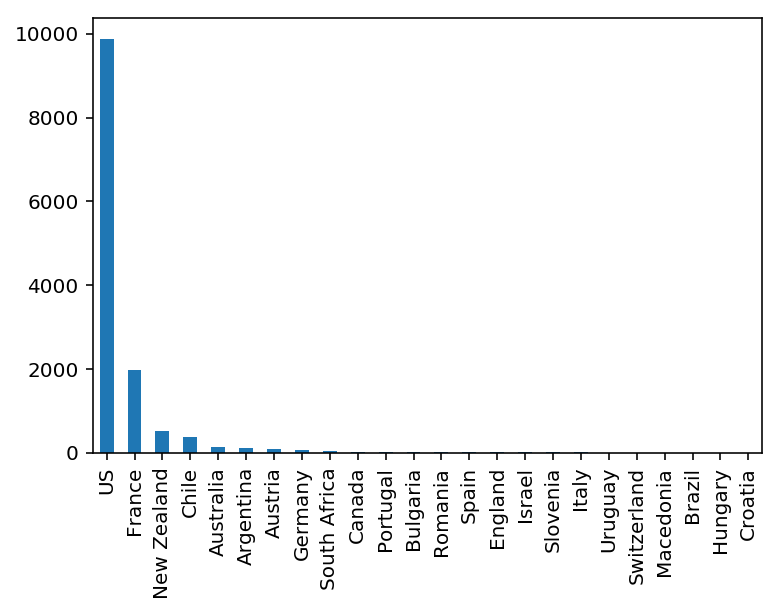

In [34]:
fulldata[fulldata['variety'] == 'Pinot Noir']['country'].value_counts().plot(kind='bar')

从直方图中看出Pinot Noir这个品种的葡萄酒大部分都产自于美国，这与本实验数据挖掘的结果一致，说明了本实验成功挖掘了属性之间的关联。